### <font color = 'purple'> HOMEWORK - 7: Natural Language Processing: Word2Vec Problems

<font color = 'purple'> <b>Step 1: Load the Wikipedia GLoVE Word2Vec.

<font color = 'blue'>We download the pre-trained Glove embeddings. We will use the glove.6B.300d.txt file, which has 300-dimensional vectors trained on Wikipedia and Gigaword.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import KeyedVectors

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import string
from sklearn_pandas import DataFrameMapper

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

<font color = 'blue'> Load the GloVe Embeddings into a Word2Vec Model

In [2]:
def load_glove_model(glove_file):
    print("Loading GloVe Model...")
    glove_model = {}
    with open(glove_file, 'r', encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    print("Done.", len(glove_model), " words loaded!")
    return glove_model

In [3]:
glove_file = 'glove.6B.300d.txt'
glove_model = load_glove_model(glove_file)

word_vectors = KeyedVectors(vector_size=300)
word_vectors.add_vectors(list(glove_model.keys()), list(glove_model.values()))

Loading GloVe Model...
Done. 400000  words loaded!


<font color = 'purple'> <b>Step 2: Show how similar are these words\
<font color = 'purple'>Man and Woman\
<font color = 'purple'>Chair and Throne\
<font color = 'purple'>water and baby

In [4]:
similarity_man_woman = word_vectors.similarity('man', 'woman')
similarity_chair_throne = word_vectors.similarity('chair', 'throne')
similarity_water_baby = word_vectors.similarity('water', 'baby')

In [5]:
print(f"Similarity between 'man' and 'woman': {similarity_man_woman}")
print(f"Similarity between 'chair' and 'throne': {similarity_chair_throne}")
print(f"Similarity between 'water' and 'baby': {similarity_water_baby}")

Similarity between 'man' and 'woman': 0.6998662948608398
Similarity between 'chair' and 'throne': 0.27552732825279236
Similarity between 'water' and 'baby': 0.24173806607723236


<font color = 'blue'> <b>Showing results with glove.6B.100.txt

In [6]:
glove_file_path_100 = "glove.6B.100d.txt"

word_vectors_100 = gensim.models.KeyedVectors.load_word2vec_format(glove_file_path_100, binary=False, no_header=True)

print("Model loaded successfully.")

Model loaded successfully.


In [7]:
similarity_man_woman = word_vectors_100.similarity('man', 'woman')
similarity_chair_throne = word_vectors_100.similarity('chair', 'throne')
similarity_water_baby = word_vectors_100.similarity('water', 'baby')

print(f"Similarity between 'man' and 'woman': {similarity_man_woman}")
print(f"Similarity between 'chair' and 'throne': {similarity_chair_throne}")
print(f"Similarity between 'water' and 'baby': {similarity_water_baby}")

Similarity between 'man' and 'woman': 0.832349419593811
Similarity between 'chair' and 'throne': 0.3001340627670288
Similarity between 'water' and 'baby': 0.40317267179489136


<font color = 'purple'> <b>Step 3: Using these provide analogies for the following:\
<font color = 'purple'>_____ is to King as Woman is to Man.\
<font color = 'purple'>_____ is to Princess as Man is to Woman.\
<font color = 'purple'>_____ is to a woman as a child is to an adult.

In [8]:
analogy_king = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)[0][0]
analogy_princess = word_vectors.most_similar(positive=['man', 'princess'], negative=['woman'], topn=1)[0][0]
analogy_woman_child = word_vectors.most_similar(positive=['woman', 'child'], negative=['adult'], topn=1)[0][0]

In [9]:
print(f"King is to Woman as Man is to: {analogy_king}")
print(f"Princess is to Man as Woman is to: {analogy_princess}")
print(f"A woman is to a child as an adult is to: {analogy_woman_child}")

King is to Woman as Man is to: queen
Princess is to Man as Woman is to: prince
A woman is to a child as an adult is to: mother


In [10]:
print(f"{analogy_king} is to King as Woman is to Man")
print(f"{analogy_princess} is to Princess as Man is to Woman")
print(f"{analogy_woman_child} is to a woman as a child is to an adult")

queen is to King as Woman is to Man
prince is to Princess as Man is to Woman
mother is to a woman as a child is to an adult


<font color = 'purple'> <b>Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset shown in the demo.

<font color = 'blue'> Loading the spam-ham dataset and checking few top rows and its shape

In [11]:
spam_df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [12]:
display(spam_df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [13]:
spam_df.shape

(5572, 5)

In [14]:
spam_df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<font color = 'blue'> There are 3 unnamed columns, dropping them to have only text and label column

In [15]:
spam_df = spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
display(spam_df)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<font color = 'blue'> These left two columns do not have any null values

<font color = 'blue'> Checking the percentage of labels in the target column

In [17]:
ham=spam_df[spam_df['v1']=='ham']
spam=spam_df[spam_df['v1']=='spam']

print('Spam Percentage =',(len(spam)/len(spam_df))*100,'%')
print('Ham Percentage =',(len(ham)/len(spam_df))*100,'%')

Spam Percentage = 13.406317300789663 %
Ham Percentage = 86.59368269921033 %


<font color = 'blue'> Plotting the target column

/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_28628/2797373814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1', data=spam_df, palette=['blue', 'yellow'])  # You can choose any color palette


Text(0, 0.5, 'Count')

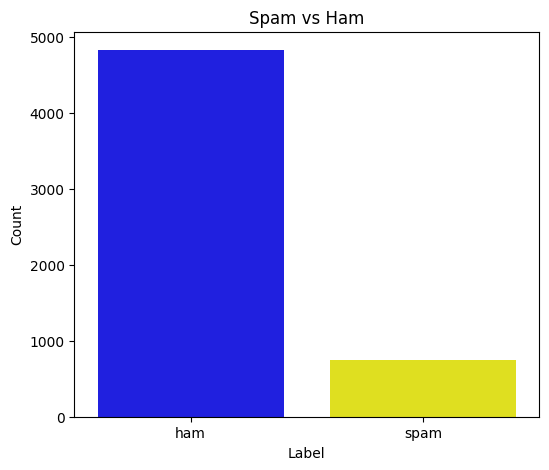

In [18]:
plt.figure(figsize=(6, 5))
sns.countplot(x='v1', data=spam_df, palette=['blue', 'yellow'])  # You can choose any color palette
plt.title('Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')

<font color = 'blue'>Removing stop words: Removing punctuation, converts text to lowercase, and stems words.

In [19]:
stop_words = []
def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])

<font color = 'blue'> Emoticon List:  List of emojis that will be checked in the messages.

In [20]:
emoticons_list = [":)", ":(", ":p", ":D", "-_-", ":o"]  

<font color = 'blue'> SMS Filtering based on character length: This will categorize the length of messages into different flags.

In [21]:
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6 

<font color = 'blue'> Text Pre-Processing

In [22]:
def preprocessing_text(raw_df):
    for d, ln in zip(raw_df, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if (re.sub(r'[^://@]', '', d.lower())) != '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emoticons_list:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i], 
                   token_7[i],token_8[i]], dtype=object) for i in
         range(len(raw_df))])

<font color = 'blue'> Data conversion to vector form: Uses DataFrameMapper to transform the data for modeling. It combines numerical features and text vectorization.

In [23]:
def data_mapper(raw_df):
    data = preprocessing_text(raw_df)
    labels = ['message','f1','f2','f3','f4','f5','f6','f7']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
    X=mapper.fit_transform(df)
    return X

In [24]:
spam_df['length'] = spam_df['v2'].apply(len)
spam_data = spam_df['v2']
spam_labels = spam_df['v1']
display(spam_df)

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [25]:
token_1 = []
token_2 = []
token_3 = []
token_4 = spam_df['length']
token_5 = []
token_6 = []
token_7 = []
token_8 = []

freq = pd.Series(' '.join(spam_data).split()).value_counts()
print(freq)

to           2134
you          1622
I            1466
a            1327
the          1197
             ... 
AOM             1
Box61,M60       1
1ER             1
Ages            1
Rofl.           1
Name: count, Length: 15585, dtype: int64


In [26]:
mapped_data = data_mapper(spam_data)
display(mapped_data)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


array([[  0,  19, 111, ...,   0,   0,   0],
       [  0,   5,  29, ...,   0,   0,   0],
       [  0,  52, 155, ...,   0,   0,   0],
       ...,
       [  0,   9,  57, ...,   0,   0,   0],
       [  0,  25, 125, ...,   0,   0,   0],
       [  0,   5,  26, ...,   0,   0,   0]])

<font color = 'blue'> Building the model using Naive-Bayes Classifier

<font color = 'blue'> Splitting spam_df into train and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mapped_data, spam_labels, test_size=0.33, random_state=42)  

In [28]:
spam_data.shape

(5572,)

In [29]:
spam_labels.shape

(5572,)

In [30]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<font color = 'blue'> Predicting

In [31]:
y_predict=NB_classifier.predict(X_test)
y_predict

array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype='<U4')

<font color = 'blue'> Printing accuracy of the model

In [32]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.9858618814573138


<font color = 'blue'> Cross-Validation

In [33]:
clf = MultinomialNB()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('5-fold cross-validation scores: ', scores)

5-fold cross-validation scores:  [0.98125837 0.97858099 0.98527443 0.98793566 0.97050938]


<font color = 'blue'> Printing confusion matrix to check the predictions

In [34]:
cm=confusion_matrix(y_test,y_predict)

Text(0.5, 1.0, 'Confusion Matrix')

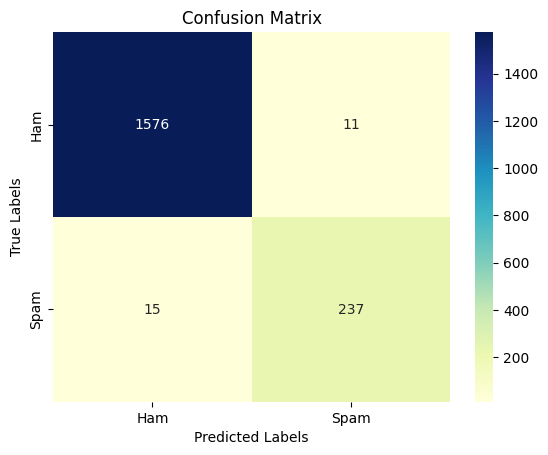

In [42]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
             xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<font color = 'blue'> Printing normalised confusion matrix: Each value in the matrix is normalized by the sum of its row

Text(0.5, 1.0, 'Normalized Confusion Matrix')

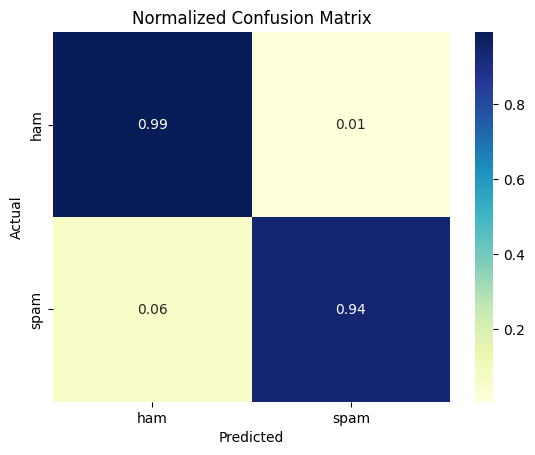

In [43]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')

<font color = 'blue'> Printing classification report

In [37]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1587
        spam       0.96      0.94      0.95       252

    accuracy                           0.99      1839
   macro avg       0.97      0.97      0.97      1839
weighted avg       0.99      0.99      0.99      1839



<font color = 'blue'> Naive Bayes classifier performed with ~99% accuracy on spam-ham dataset. The model was able to predict 99% (True Positive and True Negative) of the instances correctly, with only a few false positives and false negatives. This is confirmed by precision and recall, and F1 scores which have high scores for both labels, which tells model is able to distinguish well between two labels/classes with minimal errors.

<font color = 'blue'><b> Thank You !